### Project Proposal STAT 201 Group 4
# Proportion Inference of Suicide Attempts in Shangdong, China using Bootstrapping

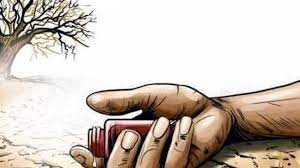

### Group 4: Eric Wei, Laksh Agarwal, Marie Samantha Fidelia, Yiting Sun

Dataset used:
https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china

## Introduction

In recent years, suicide has become a worldwide public health concern with far-reaching consequences for individuals, community and even the entire society. After accounting for changes in population size and age demographics, there has been a 16% increase in the suicide rate between 2011 and 2022, resulting in an elevation from 12.3 to 14.4 fatalities per 100,000 individuals (Saunders & Panchal, 2023). Therefore, it is important to learn about the factors, triggers, and patterns related to suicide attempts so that they can be prevented effectively. In this project, we will focus on the effect of education levels on suicide risks and compare the proportion of suicide rates between primary and secondary education levels for females. A similar reserch has been done and demonstrated that “Men with a high school education were twice as likely to die by suicide compared with those with a college degree in 2014” (Phillips & Hempstead, 2017); however, we want to examine whether the same pattern will also apply to females.

The data set we choose is “Suicide Attempts in Shandong, China” from Kaggle. This data set records the information of suicide victims such as their gender, age, education levels, occupations, and suicide methods from 2009 to 2011 in Shandong, China. We will focus on the coloums of Sex and Education. The local parameter of interest is the difference in proportion of suicide rate between two categoris of primary and secondary education level. We will calculate the standard deviation to investigate the sample variation.

#### Research Question: Is there a difference between the proportion of the suicide rates of women with primary and secondary education levels?  If so, what proportion of women in Shangdong, corresponding to the education level with the higher suicide rate, has attempted suicide?

Null hypothesis: $\widehat{p_{primary}} - \widehat{p_{secondary}} = 0$

Alternative hypothesis: $\widehat{p_{primary}} - \widehat{p_{secondary}} > 0$

## Preliminary Results

In this section, you will:

Demonstrate that the dataset can be read from the web into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot in a way that addresses your question.
Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
Be sure to not print output that takes up a lot of screen space.

### Reading Our Dataset

We can start by importing the necessary libraries for our modelling

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Let's read the chosen csv data with its column names into R 

In [2]:
suicide_data <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS0cVcc1RNtcHpY9CnuzkvM_auEuA5HloYBi9MEciadHj4R3uNXNt7ORJwHSJjod85rHzIyigMmVIGy/pub?gid=1118541132&single=true&output=csv", col_names = TRUE) |>
                select(-Number)

glimpse(suicide_data)

Rows: 2571 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Hospitalised, Died, Urban, Sex, Education, Occupation, method
dbl (5): Number, Person_ID, Year, Month, Age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,571
Columns: 11
$ Person_ID    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Hospitalised <chr> "yes", "no", "no", "no", "yes", "no", "no", "yes", "no", …
$ Died         <chr> "no", "yes", "yes", "yes", "no", "yes", "yes", "no", "yes…
$ Urban        <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no", "no…
$ Year         <dbl> 2010, 2009, 2010, 2011, 2009, 2009, 2010, 2010, 2010, 201…
$ Month        <dbl> 12, 3, 2, 1, 8, 11, 1, 10, 7, 1, 11, 3, 6, 1, 12, 2, 6, 5…
$ Sex          <chr> "female", "male", "male", "male", "male", "male", "female…
$ Age          <dbl> 39, 83, 60, 73, 51, 62, 90, 54, 66, 30, 77, 77, 79, 42, 6…
$ Education    <chr> "Secondary", "primary", "primary", "primary", "Secondary"…
$ Occupation   <chr> "household", "farming", "farming", "farming", "farming", …
$ method       <chr> "Other poison", "Hanging", "Hanging", "Hanging", "Pestici…


### Cleaning and Wrangling Data Into Tidy Format

In [3]:
missing <- filter(suicide_data, Education == "unknown") |>
           summarize(n = n())
missing

n
<int>
80


The tibble above shows that 80 rows are found to be having missing values of education.

Let's select the columns we need and then make sure that we filter out any missing values contained in our data

In [4]:
filtered_data <- suicide_data |>
                 select(Sex, Education) |>
                 filter(Education != "unknown")

head(filtered_data)

Sex,Education
<chr>,<chr>
female,Secondary
male,primary
male,primary
male,primary
male,Secondary
male,iliterate


In [7]:
iliterate <- suicide_data |>
           	 filter(Education == "iliterate")|>
		     nrow()
primary <- suicide_data |>
           filter(Education == "primary")|>
		   nrow()
secondary <- suicide_data |>
             filter(Education == "Secondary")|>
		     nrow()
tertiary <- suicide_data |>
            filter(Education == "Tertiary")|>
		    nrow()

iliterate
primary
secondary
tertiary


[1] 533

[1] 659

[1] 1280

[1] 19

Let's visualize the data that we got!

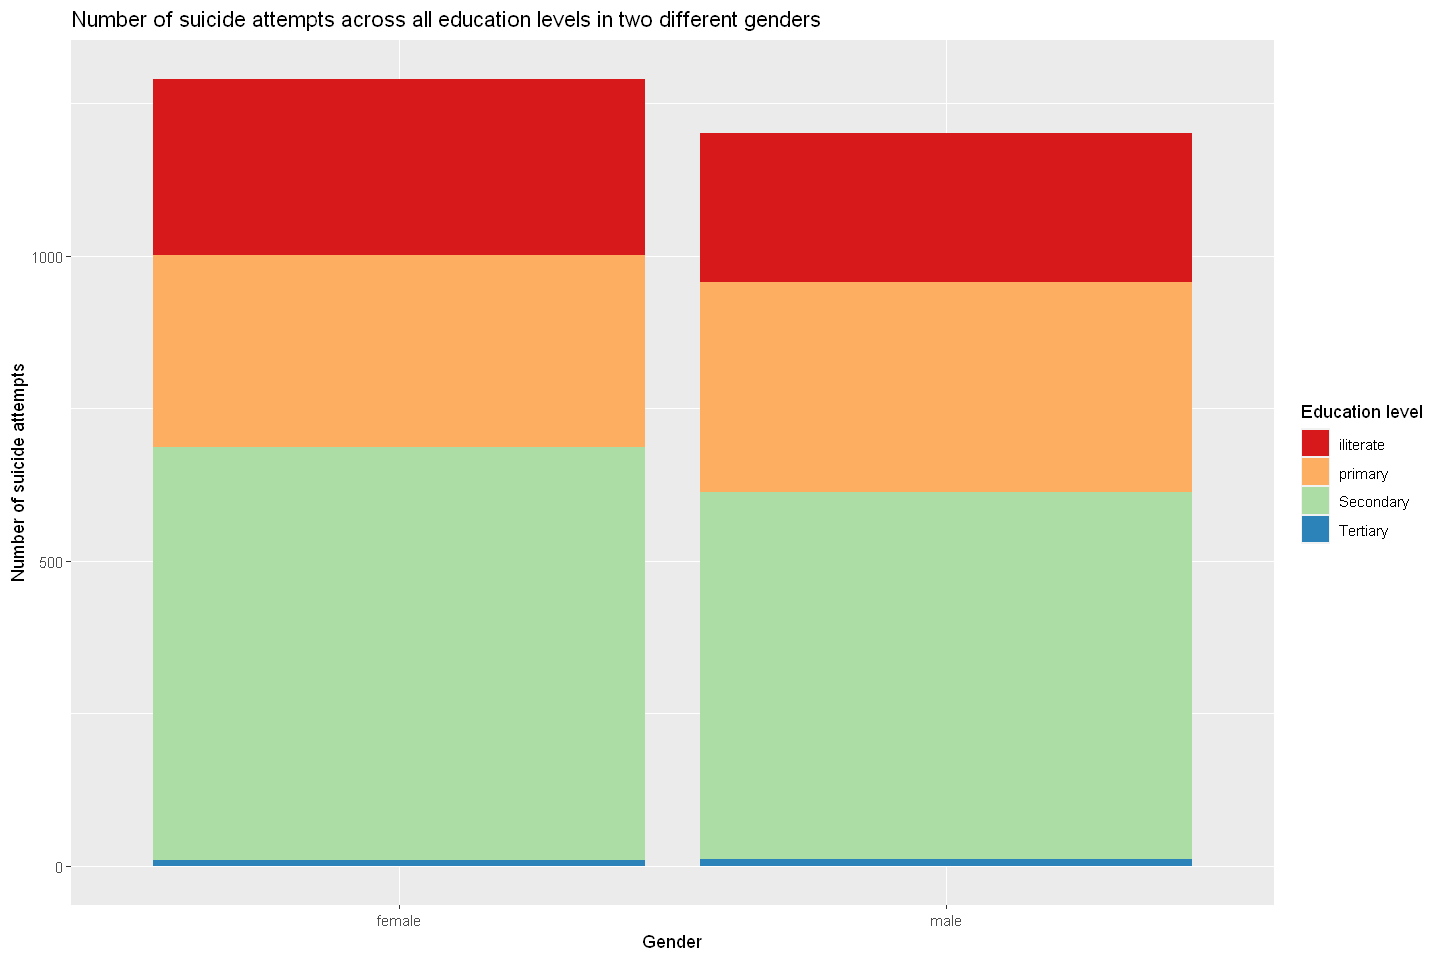

In [31]:
options(repr.plot.width = 12, repr.plot.height = 8)

bar_plot <- filtered_data |>
    ggplot(aes(x = Sex, y = 1, fill = Education)) + 
    geom_bar(stat = "identity", position = "stack") + 
    xlab("Gender") +
    ylab("Number of suicide attempts") +
    labs(fill = "Education level") +
    ggtitle("Number of suicide attempts across all education levels in two different genders") +
    scale_fill_brewer(palette = 'Spectral')
bar_plot

Since the two most prominent data are taken from women with primary and secondary educations, we will narrow our findings down and select just females with primary and secondary education as a part of our research.

In [35]:
prop_table <- filtered_data |>
              filter(Sex == "female") |>
              summarize(sex = "female", n = n(),
			  prop_iliterate = sum(Education == "iliterate")/n,
			  prop_primary = sum(Education == "primary")/n, 
			  prop_secondary = sum(Education == "Secondary")/n,
			  prop_tertiary = sum(Education == "Tertiary")/n, 
			  total_prop = prop_iliterate + prop_primary + prop_secondary + prop_tertiary) 
prop_table

sex,n,prop_iliterate,prop_primary,prop_secondary,prop_tertiary,total_prop
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
female,1290,0.224031,0.2434109,0.5255814,0.006976744,1


## Methods & Plans

This report is trustworthy because the dataset has a large sample size (2571). A large number of observations reduces “accident” such as the influence of outliers which helps to achieve more robust and reliable results. In addition, large sample size can lead to more precise estimates and predictions.


Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

## References

Heather Saunders and Nirmita Panchal. (2023, August 21). *A look at the latest suicide data and change over the last decade.* 
KFF. https://www.kff.org/mental-health/issue-brief/a-look-at-the-latest-suicide-data-and-change-over-the-last-decade/

Phillips, J. A., & Hempstead, K. (2017). Differences in U.S. suicide rates by educational attainment, 2000–2014. 
*American Journal of Preventive Medicine, 53*(4). https://doi.org/10.1016/j.amepre.2017.04.010 
